In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

#load data
df = pd.read_csv('/Users/aelefebv/Desktop/3D/allMito3D.txt')

df['MedMax'] = df['MedianSpeed']/df['MaxSpeed']
df['AxRatio'] = df['MinAx']/df['MajAx']
df.head()
df = df[df['Invasivity']>0]
# with open('/Volumes/LEFEBVRE/Mitometer/3D/allMito.txt','r') as MyFile:
#     MyFile
#     lines = csv.reader(MyFile,delimiter=",")
#     #for line in lines:
#      #   print(line)

In [4]:
from scipy import stats

# X -> features, y -> label 
allVars = ['AxRatio','Sol','Int','MedianSpeed','MedMax','Directionality']
motVars = ['MedianSpeed','MedMax','Directionality']
morphVars = ['AxRatio','Sol','Int']

In [10]:
# train test split
from sklearn.model_selection import train_test_split

X = df[allVars]
Xmot = df[motVars]
Xmorph = df[morphVars]
y = df['Invasivity']-1

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
trainXmot, testXmot, trainymot, testymot = train_test_split(Xmot, y, test_size=0.3, random_state=2)
trainXmorph, testXmorph, trainymorph, testymorph = train_test_split(Xmorph, y, test_size=0.3, random_state=2)



Int        0.423872
Sol        0.316948
AxRatio    0.259180
dtype: float64


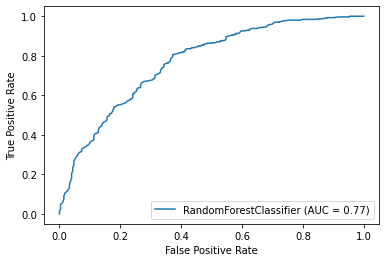

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 300)

# clf.fit(trainX,trainy)
# y_pred = clf.predict(testX)
# feature_imp = pd.Series(clf.feature_importances_,index=allVars).sort_values(ascending=False)
# print(feature_imp)
# svc_disp = plot_roc_curve(clf, testX, testy)


# clf.fit(trainXmot,trainymot)
# y_pred_mot = clf.predict(testXmot)
# feature_imp_mot = pd.Series(clf.feature_importances_,index=motVars).sort_values(ascending=False)
# print(feature_imp_mot)
# svc_disp_mot = plot_roc_curve(clf, testXmot, testymot)

clf.fit(trainXmorph,trainymorph)
y_pred_morph = clf.predict(testXmorph)
feature_imp_morph = pd.Series(clf.feature_importances_,index=morphVars).sort_values(ascending=False)
print(feature_imp_morph)
svc_disp_morph = plot_roc_curve(clf, testXmorph, testymorph)



[0.         0.         0.         0.00364964 0.00364964 0.01094891
 0.01459854 0.01459854 0.01824818 0.02554745 0.03284672 0.03284672
 0.03649635 0.04014599 0.04014599 0.04379562 0.04379562 0.04744526
 0.04744526 0.04744526 0.05474453 0.05839416 0.0620438  0.06569343
 0.0729927  0.0729927  0.08759124 0.09124088 0.09489051 0.09854015
 0.10218978 0.11313869 0.11313869 0.11313869 0.11678832 0.12408759
 0.12773723 0.12773723 0.13138686 0.13868613 0.14233577 0.1459854
 0.15328467 0.15693431 0.15693431 0.16423358 0.16423358 0.17153285
 0.17153285 0.17518248 0.17518248 0.17883212 0.17883212 0.17883212
 0.18613139 0.18978102 0.20072993 0.2080292  0.2189781  0.22262774
 0.23357664 0.23357664 0.24087591 0.24087591 0.24087591 0.24452555
 0.24452555 0.25182482 0.25547445 0.25547445 0.25912409 0.26642336
 0.26642336 0.26642336 0.26642336 0.27007299 0.27737226 0.2919708
 0.30656934 0.30656934 0.31386861 0.31386861 0.31386861 0.31386861
 0.31751825 0.32116788 0.32846715 0.33211679 0.33211679 0.332116

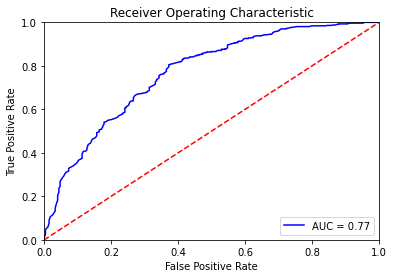

In [17]:
from sklearn import metrics

probs = clf.predict_proba(testXmorph)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testymorph, preds)
roc_auc = metrics.auc(fpr, tpr)
print(fpr)
print(tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
with open("3D_TPR_morph.txt", "w") as txt_file:
    for line in [fpr]:
        np.savetxt(txt_file, line)
txt_file.close()

In [77]:
svc_disp_morph

In [46]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(testy,y_pred))
print("Accuracy", metrics.accuracy_score(testymot,y_pred_mot))
print("Accuracy", metrics.accuracy_score(testymorph,y_pred_morph))

Accuracy 0.7269762734735185
Accuracy 0.6560215900146182
Accuracy 0.6806477004385472
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [47]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [48]:
# header_names = [['MajAx','MinAx','ZAx','Sol','MaxSpeed','Directionality',]]

clf.fit(trainX,trainy)
y_pred = clf.predict(testX)
feature_imp = pd.Series(clf.feature_importances_,index=allVars).sort_values(ascending=False)
feature_imp

MedianSpeed       0.223181
Int               0.217109
Sol               0.177881
AxRatio           0.158920
Directionality    0.113961
MedMax            0.108948
dtype: float64

In [49]:
## Logistic Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
colsToUse = allVars
X = df[colsToUse]
# X = df[feat_cols]
y = df['Invasivity']-1

In [67]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)


In [68]:
model.predict_proba(X)

array([[0.34741774, 0.65258226],
       [0.39186772, 0.60813228],
       [0.65586675, 0.34413325],
       ...,
       [0.18144741, 0.81855259],
       [0.09202349, 0.90797651],
       [0.16144307, 0.83855693]])

In [69]:
model.predict(X)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
model.score(X,y)

0.7036637203967344

In [71]:
confusion_matrix(y, model.predict(X))

array([[ 2222,  7849],
       [  935, 18636]])

In [72]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.70      0.22      0.34     10071
           1       0.70      0.95      0.81     19571

    accuracy                           0.70     29642
   macro avg       0.70      0.59      0.57     29642
weighted avg       0.70      0.70      0.65     29642



In [73]:
## ROC Curves
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [75]:
colsToUse = allVars
Xmot=df[motVars]
Xmorph=df[morphVars]
X = df[allVars]
# X = df[feat_cols]
y = df['Invasivity']-1

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
trainXmot, testXmot, trainymot, testymot = train_test_split(Xmot, y, test_size=0.3, random_state=2)
trainXmorph, testXmorph, trainymorph, testymorph = train_test_split(Xmorph, y, test_size=0.3, random_state=2)


[-1.54743257  0.16152991 -0.01313972  4.61030696 -0.2075648   0.44656373]
[ 5.17455864 -0.18758768  0.44995758]
[-1.38540516 -0.715173   -0.01530697]
No Skill: ROC AUC=0.500
Logistic All Parameters: ROC AUC=0.686
Logistic Motility Parameters: ROC AUC=0.678
Logistic Morphology Parameters: ROC AUC=0.619


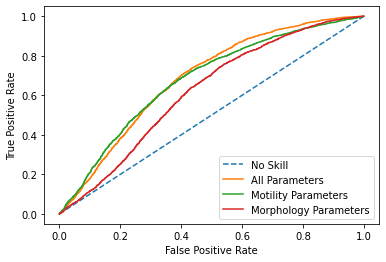

In [76]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='liblinear')


#all parameters
model.fit(trainX, trainy)
importance = model.coef_[0]
print(importance)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

#just motility
model.fit(trainXmot, trainy)
importance = model.coef_[0]
print(importance)
# predict probabilities
lrMot_probs = model.predict_proba(testXmot)
# keep probabilities for the positive outcome only
lrMot_probs = lrMot_probs[:, 1]
# calculate scores
lrMot_auc = roc_auc_score(testy, lrMot_probs)

#just morphology
model.fit(trainXmorph, trainy)
importance = model.coef_[0]
print(importance)
# predict probabilities
lrMorph_probs = model.predict_proba(testXmorph)
# keep probabilities for the positive outcome only
lrMorph_probs = lrMorph_probs[:, 1]
# calculate scores
lrMorph_auc = roc_auc_score(testy, lrMorph_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic All Parameters: ROC AUC=%.3f' % (lr_auc))
print('Logistic Motility Parameters: ROC AUC=%.3f' % (lrMot_auc))
print('Logistic Morphology Parameters: ROC AUC=%.3f' % (lrMorph_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
lrMot_fpr, lrMot_tpr, _ = roc_curve(testy, lrMot_probs)
lrMorph_fpr, lrMorph_tpr, _ = roc_curve(testy, lrMorph_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='', label='All Parameters')
pyplot.plot(lrMot_fpr, lrMot_tpr, marker='', label='Motility Parameters')
pyplot.plot(lrMorph_fpr, lrMorph_tpr, marker='', label='Morphology Parameters')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()